# Optimizing Kaggle kernels using Intel(R) Extension for Scikit-learn*

For classical machine learning algorithms, we often use the most popular Python library, [scikit-learn](https://scikit-learn.org/stable/). We use it to fit models and search for optimal parameters, but scikit-learn sometimes works for hours, if not days. Speeding up this process is something anyone who uses scikit-learn would be interested in.

I want to show you how to get results faster without changing the code. To do this, we will use another Python library, **[scikit-learn-intelex](https://github.com/intel/scikit-learn-intelex)**. It accelerates scikit-learn and does not require you changing the code written for scikit-learn.

I will use a Kaggle notebook in which the train and predict of the SVM model executed in over 7 minutes.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

x_train = train[train.columns[1:]]
x_test = test
y_train = train[train.columns[0]]

train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x_train, y_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

Let's take the training and predict into a separate function:

In [ ]:
def train_predict():
    from sklearn.svm import SVC
    clf = SVC(C=10, kernel="rbf")
    clf.fit(x_train, y_train)
    return clf.predict(x_test)

In [ ]:
%%time
y_pred_original = train_predict()

In [ ]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub.Label = y_pred_original
sub.to_csv('submission_original.csv',index=False)

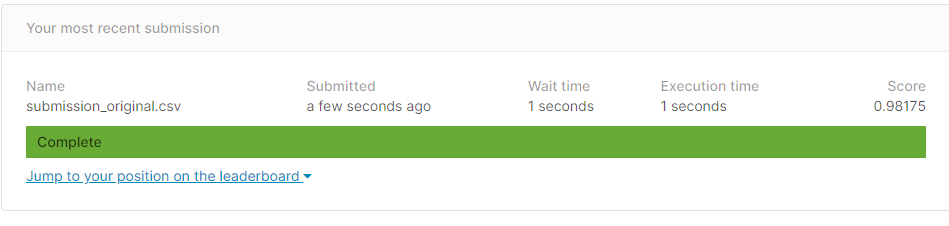

The train and predict of the SVM model took almost 7 minutes. Let's try to use scikit-learn-intelex. First, download it:

In [ ]:
!pip install scikit-learn-intelex --progress-bar off >> /tmp/pip_sklearnex.log

To get optimizations, patch scikit-learn using scikit-learn-intelex:

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Let’s run the same code to train and predict the SVM model:

In [ ]:
%%time
y_pred_oprimized = train_predict()

This time, the train and predict took **a little over minute**, which saved us almost **7 minutes**! Let’s make sure that the quality has not changed:

In [ ]:
np.mean(y_pred_oprimized == y_pred_original)

In [ ]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub.Label = y_pred_oprimized
sub.to_csv('submission_sklearnex.csv',index=False)

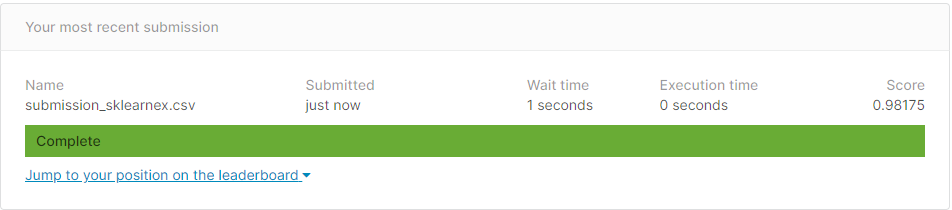
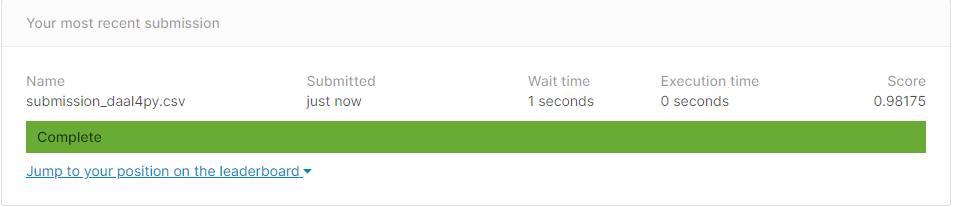

With scikit-learn-intelex patching you can:

- Use your scikit-learn code for training and inference without modification.
- Train and predict scikit-learn models up to **7 times faster**.
- Get the same quality of predictions as other tested frameworks.

*Please, upvote if you like.*